# jammer
## 17 - More IGRINS orders
### Part II. Spot check the Starfish model

In [1]:
import pandas as pd

# m 109

In [5]:
dat = pd.read_csv('../sf/2M0136/m110/output/marley_grid/run01/spec_config.csv')

In [6]:
dat.head(2)

,data,wl,model_composite
0,45624.500,16260.099,53259.574731
1,46846.699,16260.200,53273.043521


(0, 100000)

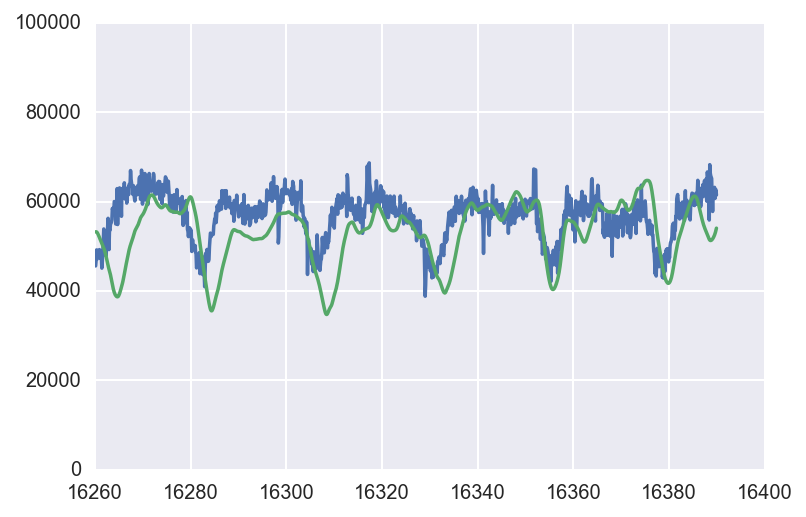

In [7]:
plt.plot(dat.wl, dat.data, label='Data')
plt.plot(dat.wl, dat.model_composite, label='Model')
plt.ylim(0, 100000)

I settled on $\log{\Omega}=1.17$.  Weird that the lines seem to be shifted?

What about the strength of the GP correlation scale?

In [8]:
from scipy.stats import multivariate_normal

In [9]:
CC = np.load('../sf/2M0136/m110/output/marley_grid/run01/CC_new.npy')

In [10]:
nz_draw = multivariate_normal(dat.model_composite, CC)

In [11]:
CC.diagonal()

array([ 3340779.74354449,  3339823.61576324,  3310791.26456369, ...,
        3160945.57024025,  3162309.66582436,  3668658.10816784])

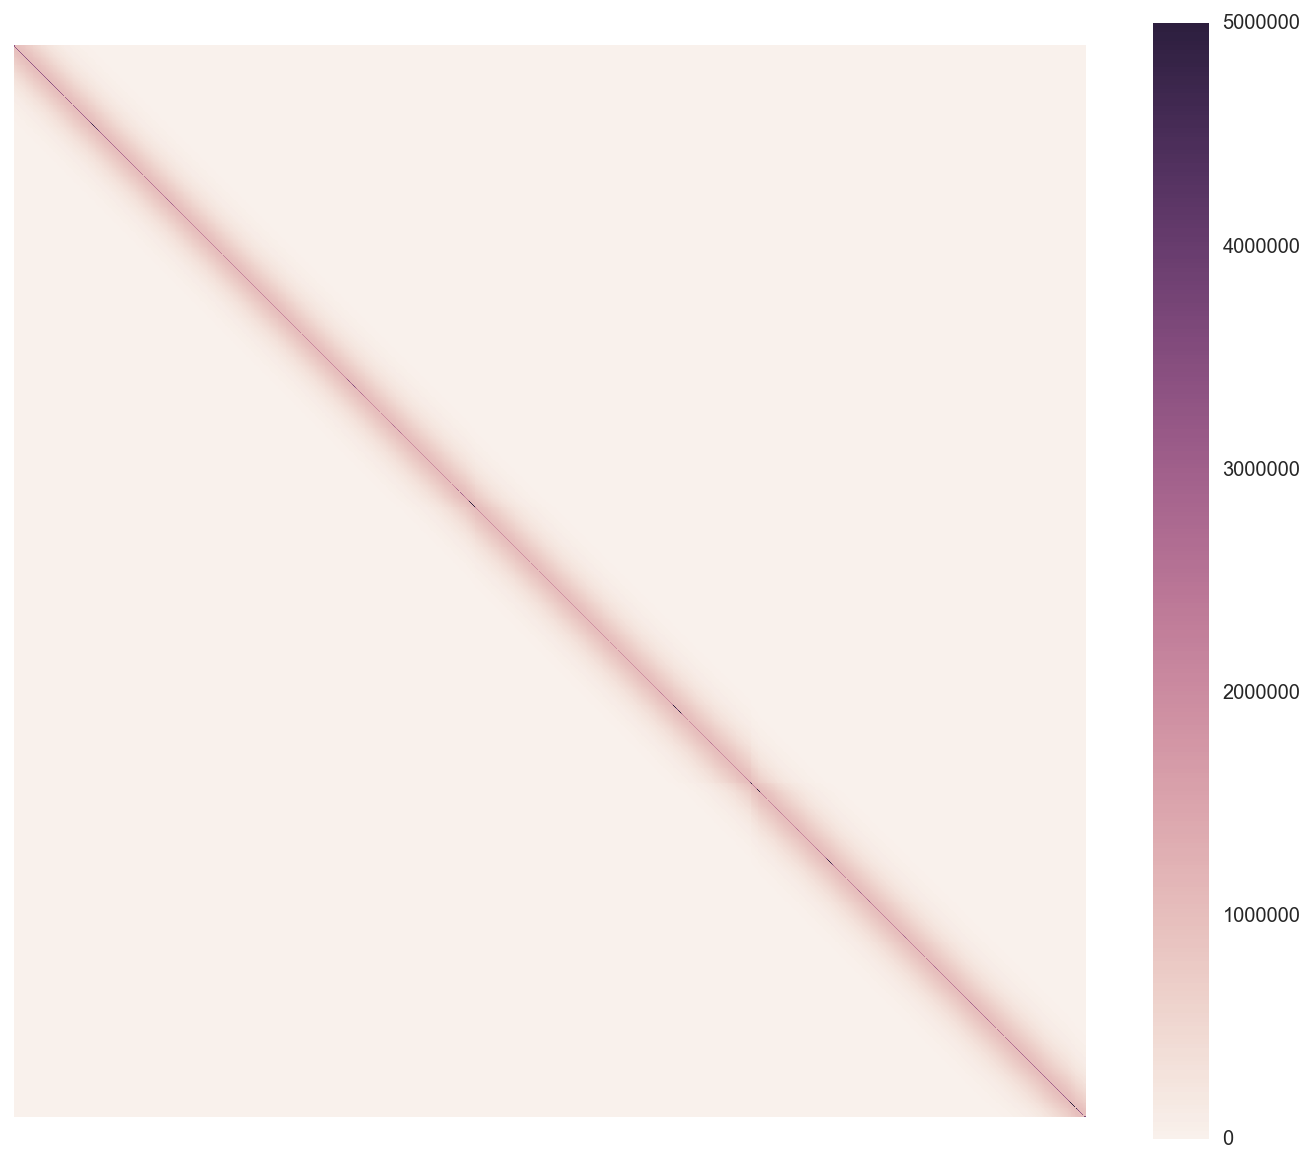

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(CC, xticklabels=False, yticklabels=False, vmax=5.0e6, square=True)

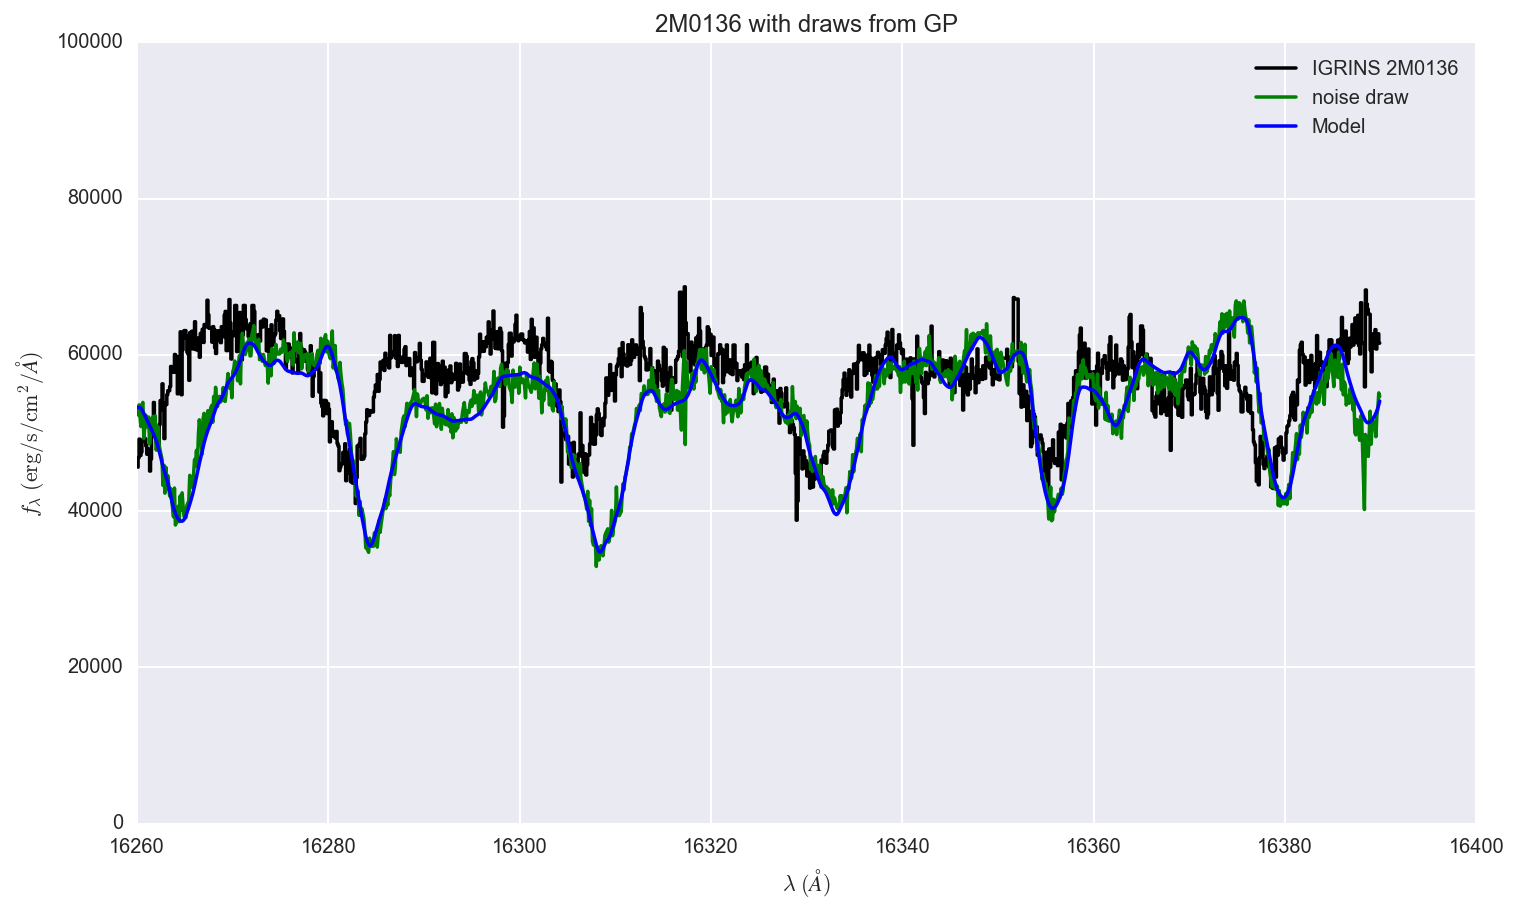

In [13]:
plt.figure(figsize=(12, 7))
plt.step(dat.wl, dat.data, 'k', label='IGRINS 2M0136')


plt.plot(dat.wl, nz_draw.rvs(), 'g-', label='noise draw')
#for i in range(10):
#    plt.plot(dat.wl, nz_draw.rvs(), 'g-', alpha=0.3)

plt.plot(dat.wl, dat.model_composite, 'b-', label='Model')

plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('2M0136 with draws from GP')
plt.legend(loc='best')
plt.ylim(0, 100000)
plt.yscale('linear')

Looks like we want GP values in the vicinity:

```json
  "l": 60.0,
  "logAmp": 3.0,
```

Ok, this will be our initial stellar parameter guess:

```yaml
grid: [1300.0, 4.5]
logOmega: 1.3
vsini: 45.0
vz: 0.0
```

### The end.